CONTEXTO

El Dataset refleja un reporte sobre terminaciones de una empresa. A traves de este dataset se pueden observar patrones para determinar principales causas de porque el trabajando esta renunciando, que tipo de trabajador esta renunciando y crear un sistema de prediccion de terminaciones para tomar decisiones antes de que pasen. 

SMART 
Identificar que tipo de empleados y por que estan renunciando a la empresa con el objetivo de poder crear planes de accion para reducir el porcentaje de terminaciones de la empresa y reducir el costo de rotacion.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import sklearn



file_path = 'HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.shape

(1470, 35)

Total de empleados: 1469;  Promedio de edad es 37 años; satisfaccion del ambiente 2.72/4; trabajan en promedio 65.89 horas. En Promedio los trabajadores llevan 4 años en el mismo puesto y con el mimsom manager. 

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

 0   Age                           Numerica 
 
 1   Attrition                     Boolean
 
 2   BusinessTravel                Categorica
 
 3   DailyRate                     Numerica 
 
 4   Department                    Categorica
 5   DistanceFromHome              Numerica  
 
 
 6   Education                     Numerica  
 
 7   EducationField                Categorica
 
 8   EmployeeCount                 Numerica 
 
 9   EmployeeNumber                Numerica 
 
 10  EnvironmentSatisfaction      Numerica  
 
 11  Gender                        Categorica
 
 12  HourlyRate                   Numerica 
 
 13  JobInvolvement                Numerica 
 
 14  JobLevel                      Numerica 
 
 15  JobRole                       Categorica
 
 16  JobSatisfaction               Numerica 
 
 17  MaritalStatus                 Categorica
 
 18  MonthlyIncome                Numerica 
 
 19  MonthlyRate                   Numerica 
 
 20  NumCompaniesWorked            Numerica 
 
 
 21  Over18                        Categorica
 
 22  OverTime                      Categorica
 
 23  PercentSalaryHike             Numerica 
 
 24  PerformanceRating             Numerica 
 
 25  RelationshipSatisfaction     Numerica  
 
 26  StandardHours                 Numerica  
 
 27  StockOptionLevel             Numerica  
 
 28  TotalWorkingYears            Numerica  
 
 29  TrainingTimesLastYear         Numerica  
 
 30  WorkLifeBalance               Numerica  
 
 31  YearsAtCompany               Numerica 
 
 32  YearsInCurrentRole            Numerica  
 
 33  YearsSinceLastPromotion       Numerica  
 
 34  YearsWithCurrManager         Numerica  

De esta lista considero que las variables mas importantes son Age, Attrition, Department, Distance from Home, Education Field, Gender,  Hourly Rate, Job Role, Job Satisfaction, Marital Status, monthly income, ya que estas variables pueden mostrar claramente patrones de porque el empleado esta renunciando. 

In [8]:
counts_attrition = df['Attrition'].value_counts()
total_counts_attrition = counts_attrition.sum()

print("counts_attrition:\n", counts_attrition)


counts_attrition:
 No     1233
Yes     237
Name: Attrition, dtype: int64


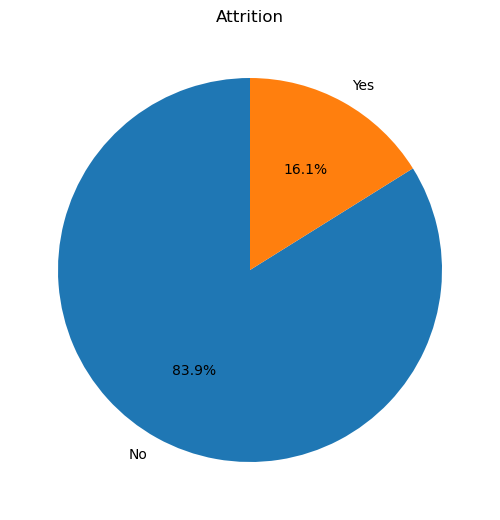

In [9]:
tabla_freq_att = pd.DataFrame(df['Attrition'].value_counts())
tabla_freq_att.columns = ['Freq. Abs.']
tabla_freq_att['Freq. Rel.'] = (tabla_freq_att['Freq. Abs.'] / len(df)) * 100


fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq_att['Freq. Rel.'], labels=tabla_freq_att.index, autopct='%1.1f%%', startangle=90)
plt.title('Attrition')
plt.show()

Vemos que del total de personas que ha estado en la compañia, el 16.12%  ha renunciado, es un numero considerable pero no alarmante.

In [10]:
counts = df['Gender'].value_counts()


total_counts = counts.sum()
percent_Male = (counts['Male'] / total_counts) * 100
percent_Female = (counts['Female'] / total_counts) * 100


print("Counts:\n", counts)
print("\nPercentages:\n Male:", percent_Male, "%\n Female:", percent_Female, "%")

Counts:
 Male      882
Female    588
Name: Gender, dtype: int64

Percentages:
 Male: 60.0 %
 Female: 40.0 %


Podemos observar que hay mayor proporcion de hombres que mujeres que han trabajado en la compañia. 

Filtraremos la tabla para mostrar solo valores  en la columna Attrition = Yes

In [11]:
df_yes = df[df['Attrition'] == 'Yes']
df_yes.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [23]:
df_yes.shape

(237, 35)

In [27]:
df_yes.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


En las terminaciones comaprado con todos los que han trabajado en la empresa, la edad promedio bajo de 37 a 34, el salario de 802 a 750, el tiempo con el actual jefe de 4 a 3, el promedio de antiguedad paso de 7 a 5.

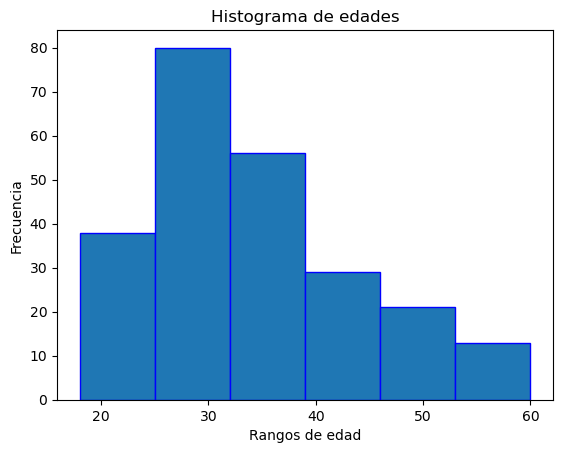

In [16]:
age_ranges = [18, 25, 32, 39, 46, 53, 60]

Age = df_yes['Age'].tolist()

plt.hist(Age, bins=age_ranges, edgecolor='blue')


plt.title('Histograma de edades')
plt.xlabel('Rangos de edad')
plt.ylabel('Frecuencia')


plt.show()

Agrupando los datos de Edad por los siguentes rangos, 18-24 años, 25-31 años, 32-38 años, 39-45 años, 46-52 años, 53-60 años, Tenemos que la mayoria de terminacionas se ubican en el rango edad de 25 a 31 con 80 terminaciones, seguido por  32 a 38 años con 56 terminaciones y 18 a 24 con 38 terminaciones. Se evidencia que la mayoria de personas que renuncian de esta empres son personas jovenes. 

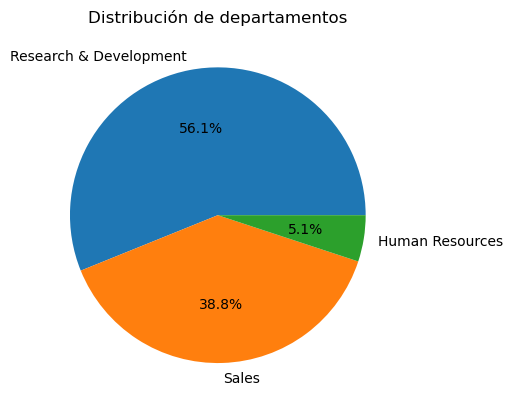

In [18]:

department_values = df_yes['Department'].value_counts()

plt.pie(department_values, labels=department_values.index, autopct='%1.1f%%')

plt.title('Distribución de departamentos')

plt.show()


Segun el pie chart, la mayoria de terminaciones se dan en el departamento de investigacion y desarrollo con 56.1%, lo cual aclara mas donde se dan las terminaciones.  

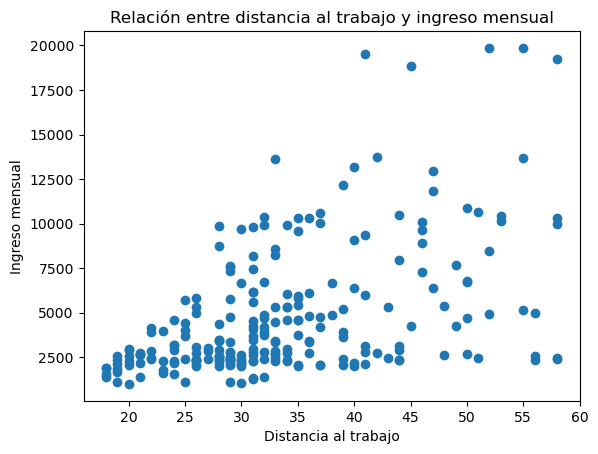

In [22]:
import matplotlib.pyplot as plt


distance_values = df_yes['Age'].tolist()
income_values = df_yes['MonthlyIncome'].tolist()


plt.scatter(distance_values, income_values)


plt.title('Relación entreedad e ingreso mensual')
plt.xlabel('Distancia al trabajo')
plt.ylabel('Ingreso mensual')


plt.show()

En la scatter chart podemos confirmar que la mayoria de terminaciones son personas jovenes y que las personas jovenes son las que tienen salario mas bajos.

In [31]:

df_yes.groupby('Department')['EnvironmentSatisfaction'].mean()


Department
Human Resources           2.333333
Research & Development    2.473684
Sales                     2.467391
Name: EnvironmentSatisfaction, dtype: float64

Podemos ver que la satisfaccion del ambiente es muy pareja entre departamentos, la mas alta es recursos humanos, pero no por mucho y las terminaciones en recursos humanos son de apenas 5.1%

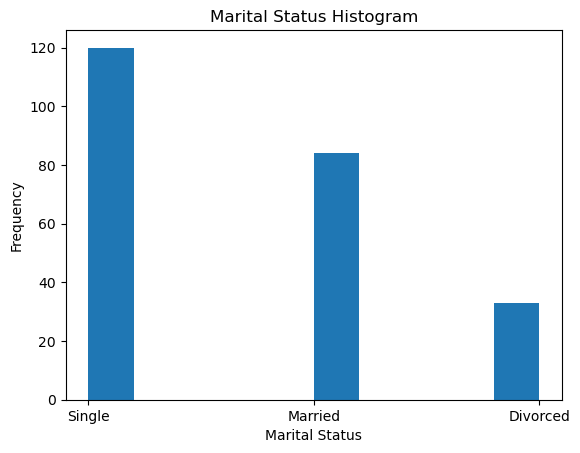

In [35]:

marital_status = df_yes['MaritalStatus']


plt.hist(marital_status)


plt.title('Marital Status Histogram')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')


plt.show()


De acuerdo a la grafica, la mayoria de terminaciones se dan entre las personas solteras. No es concluyente pero si ayuda a entender un poco mas el tipo de terminaciones de esta empresa


In [36]:
null_counts = df_yes.isnull().sum()


print(null_counts)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [37]:

discrete_columns = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


for column in discrete_columns:
    print("Valores únicos para la columna '{}':".format(column))
    print(df_yes[column].value_counts())
    print("\n")


Valores únicos para la columna 'BusinessTravel':
Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: BusinessTravel, dtype: int64


Valores únicos para la columna 'Department':
Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64


Valores únicos para la columna 'Education':
3    99
4    58
2    44
1    31
5     5
Name: Education, dtype: int64


Valores únicos para la columna 'EducationField':
Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: EducationField, dtype: int64


Valores únicos para la columna 'EnvironmentSatisfaction':
1    72
3    62
4    60
2    43
Name: EnvironmentSatisfaction, dtype: int64


Valores únicos para la columna 'JobInvolvement':
3    125
2     71
1     28
4     13
Name: JobInvolvement, dtype: int64


Valores únicos para la columna 'JobLevel':
1    143
2     52
3     32
5  

Vemos que la mayoria de terminaciones se dan en personas que casi no viajan por trabajo, tienen una educacion intermedia, tienen educacion en ciencia, la satisfaccion del ambiente es baja(1), estan en una posicion baja, la mayoria no tienen opcion de acciones de la empresa.

Resumen estadístico de las variables continuas:
              Age    DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
count  237.000000   237.000000        237.000000  237.000000     237.000000   
mean    33.607595   750.362869         10.632911   65.573840    4787.092827   
std      9.689350   401.899519          8.452525   20.099958    3640.210367   
min     18.000000   103.000000          1.000000   31.000000    1009.000000   
25%     28.000000   408.000000          3.000000   50.000000    2373.000000   
50%     32.000000   699.000000          9.000000   66.000000    3202.000000   
75%     39.000000  1092.000000         17.000000   84.000000    5916.000000   
max     58.000000  1496.000000         29.000000  100.000000   19859.000000   

        MonthlyRate  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
count    237.000000         237.000000      237.000000          237.000000   
mean   14559.308017           8.244726        5.130802            2.902954   
std   

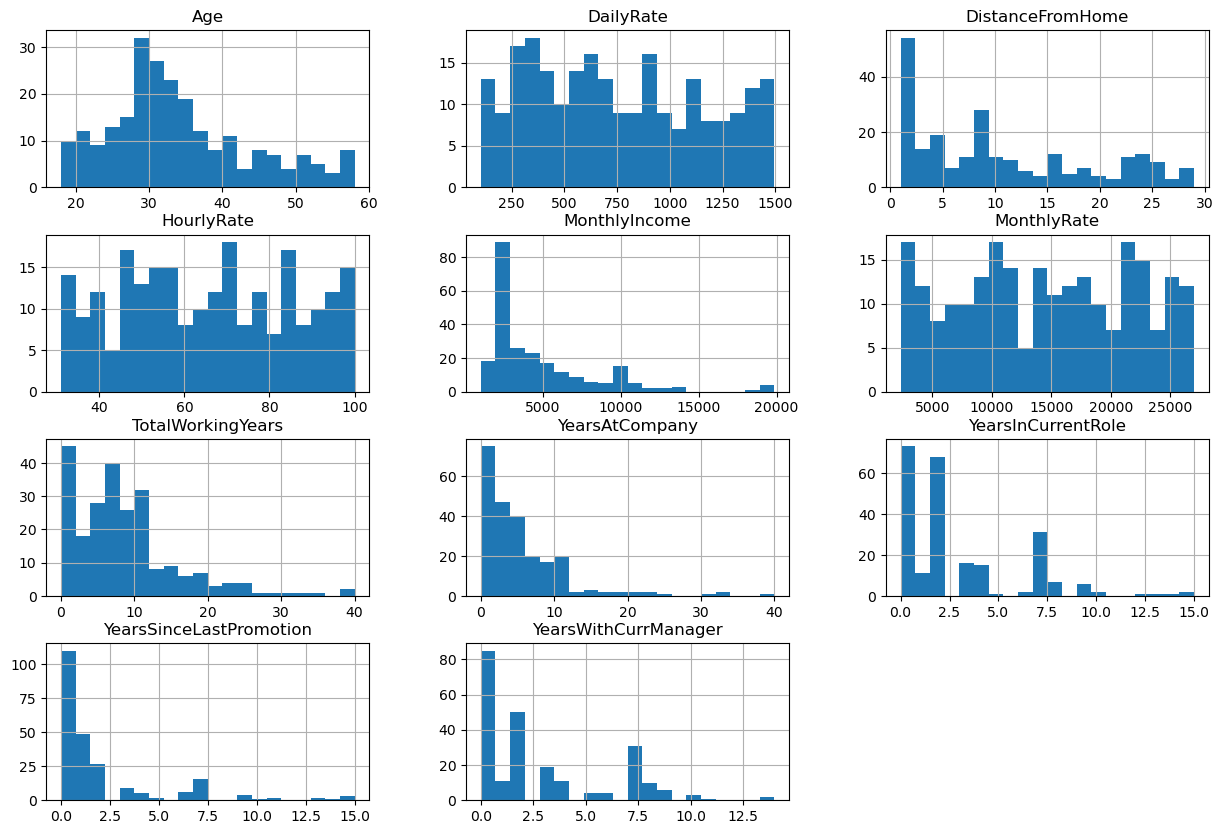

Boxplots de las variables continuas:


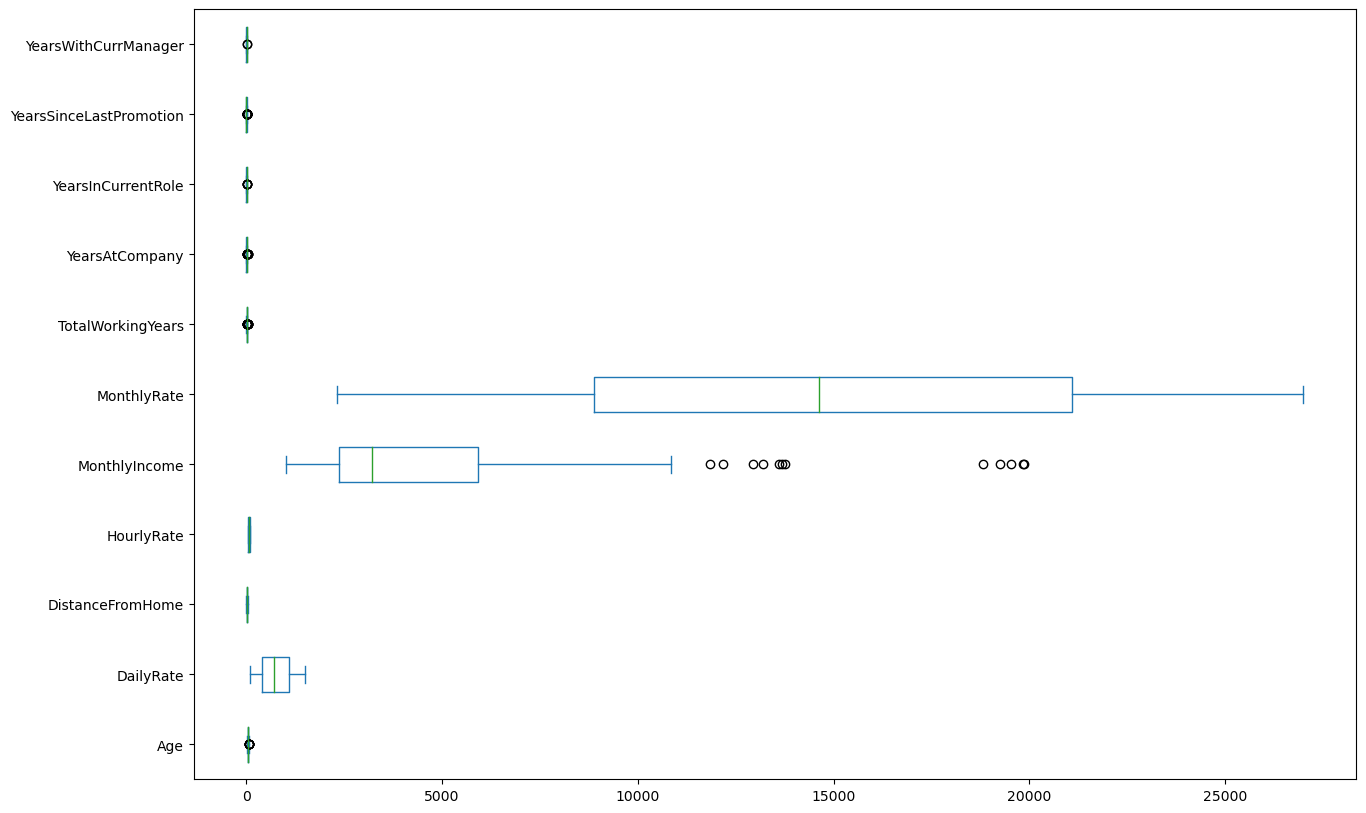

In [38]:

continuous_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

print("Resumen estadístico de las variables continuas:")
print(df_yes[continuous_columns].describe())
print("\n")


print("Histogramas de las variables continuas:")
df_yes[continuous_columns].hist(bins=20, figsize=(15, 10))
plt.show()


print("Boxplots de las variables continuas:")
df_yes[continuous_columns].plot(kind='box', vert=False, figsize=(15, 10))
plt.show()


Este analisis de variables continuas muestra informacion interesante, vemos que la mayoria de personas que renuncio vive cerca a al trabajo, ganan menos de $10000 mensualmente, llevan menos de 5 años en la compañia.